In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using GLMakie

In [3]:
using Revise
includet("./base.jl")
using StatsBase

Precompiling packages...
  34987.0 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 39 seconds. 528 already precompiled.


In [4]:
using CairoMakie

# Space

In [305]:
f = jldopen("./main2_results.jld2")
sf = f["final_states"];
f

JLDFile /home/honza/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/mm_v2_explike/main2_results.jld2 (read-only)
 ├─🔢 logKs
 ├─🔢 ls
 ├─🔢 params
 ├─🔢 retcodes
 ├─🔢 final_states
 ├─🔢 L
 ├─🔢 sN
 └─🔢 epsilon

## Looking at final state abundances

In [249]:
# final states averaged accros space
sfsums = map(sf) do su
    mean(su; dims=2)[:,1]
end;

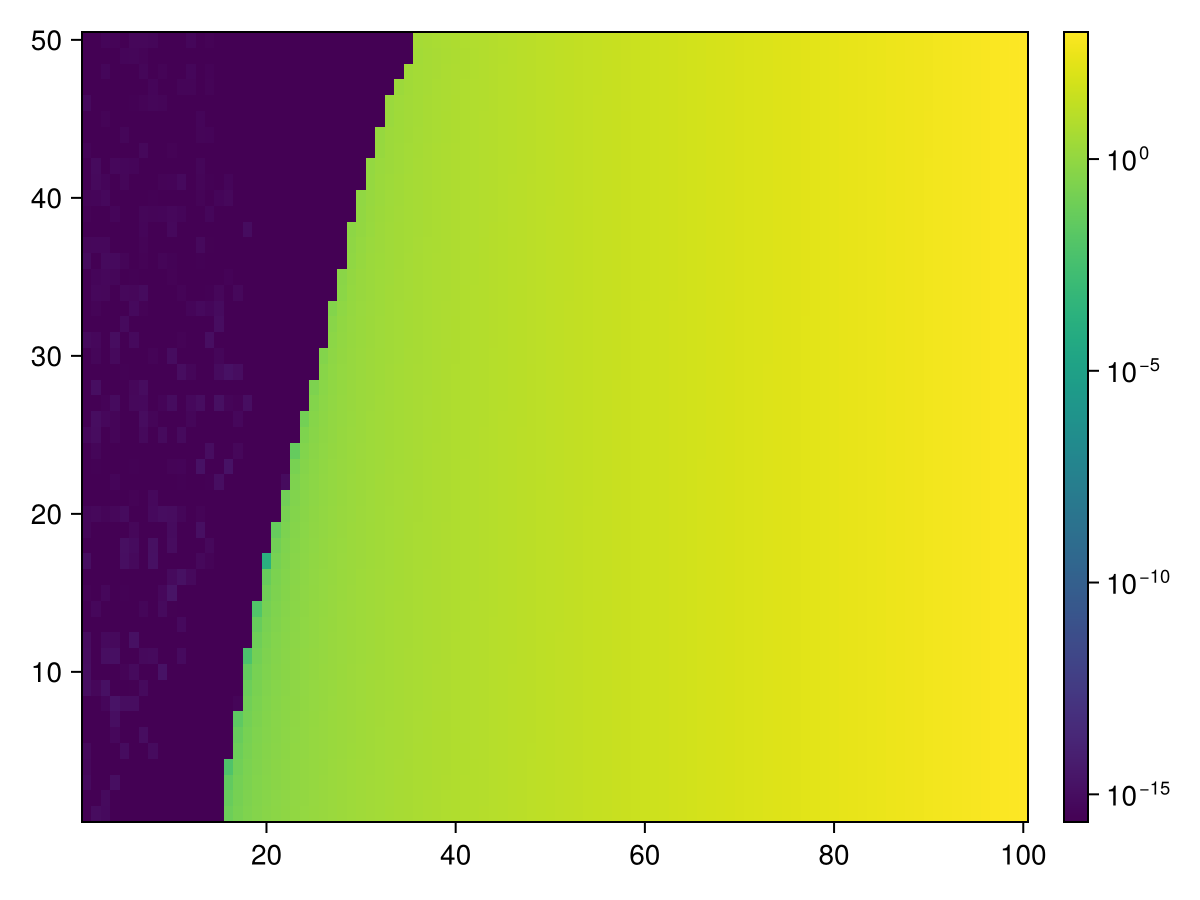

In [250]:
xx = getindex.(sfsums, 1)
yy = clamp.(xx, max(minimum(xx), eps()), Inf)
fap = heatmap(yy;
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

### Comparing to no-space final abundances!

In [251]:
ns = m3r.final_states
ws = sfsums;

In [252]:
Nns = getindex.(ns, 1)
Nws = getindex.(ws, 1);

#### Plotting side by side

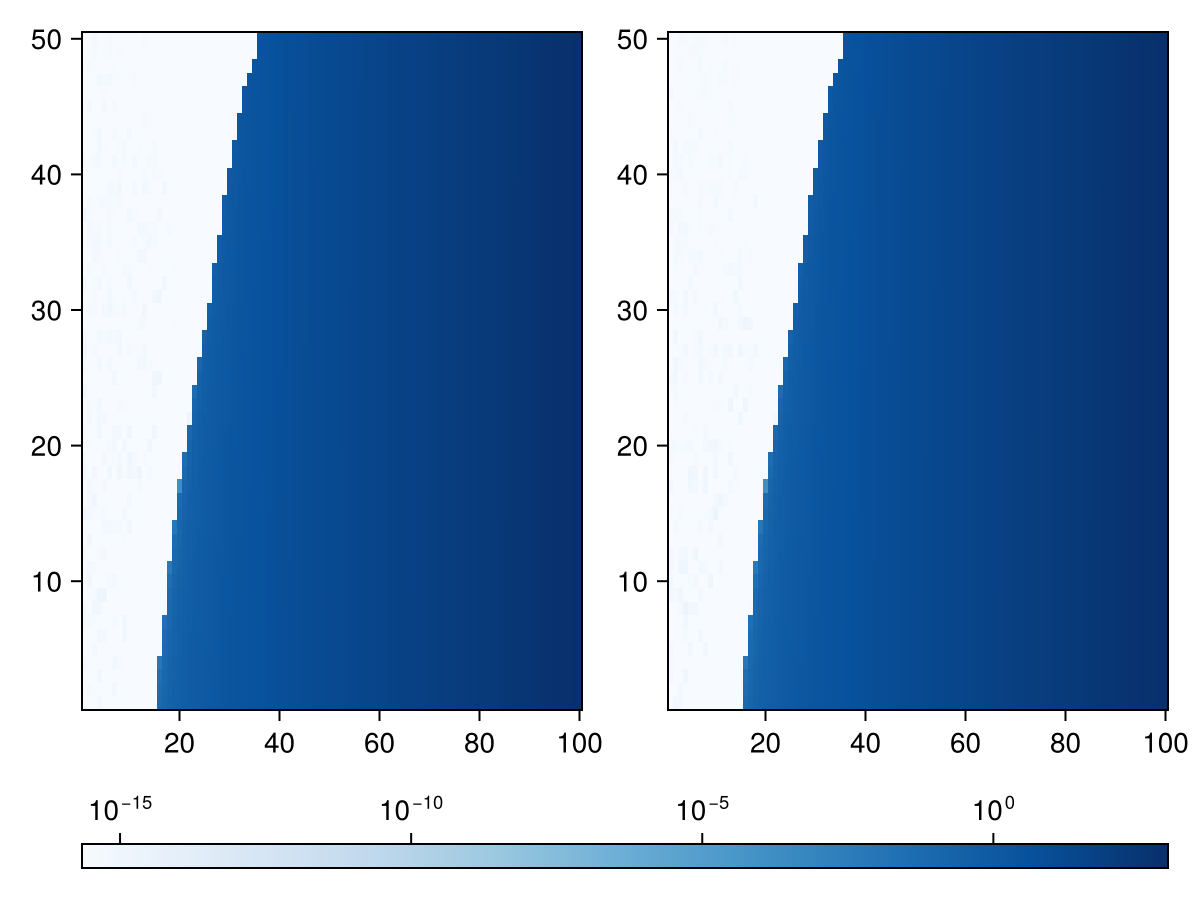

In [253]:
minval = max(min(minimum(Nws), minimum(Nns)), eps())
maxval = max(maximum(Nws), maximum(Nns))
cNws = clamp.(Nws, minval, Inf)
cNns = clamp.(Nns, minval, Inf)

f = Figure()
ax1 = Axis(f[1,1])
ax2 = Axis(f[1,2])

hm_kwargs = (;
    colormap=:Blues,
    colorrange=(minval, maxval),
    colorscale=log10
)

hm1 = heatmap!(ax1, cNns; hm_kwargs...)
hm2 = heatmap!(ax2, cNws; hm_kwargs...)

Colorbar(f[2,:], hm1; vertical=false)


f
# fap = heatmap(dN ./ (Nws .+ Nns);
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000*eps())
    # colorscale=Makie.pseudolog10
# )
# Colorbar(fap.figure[1,2], fap.plot)
# fap

#### Survivability only

In [263]:
thrh = 1e-10
surns = Nns .> thrh
surws = Nws .> thrh;

status = similar(surns, Int)
for i in eachindex(surns)
    status[i] = if !(surns[i]) && !(surws[i])
        1
    elseif !(surns[i]) && (surws[i])
        2
    elseif (surns[i]) && !(surws[i])
        3
    elseif (surns[i]) && (surws[i])
        4
    else
        throw(ErrorException("KAKAK"))
    end
end
countmap(status)

Dict{Int64, Int64} with 2 entries:
  4 => 3824
  1 => 1176

#### Looking at the difference

In [246]:
dN = Nws .- Nns;

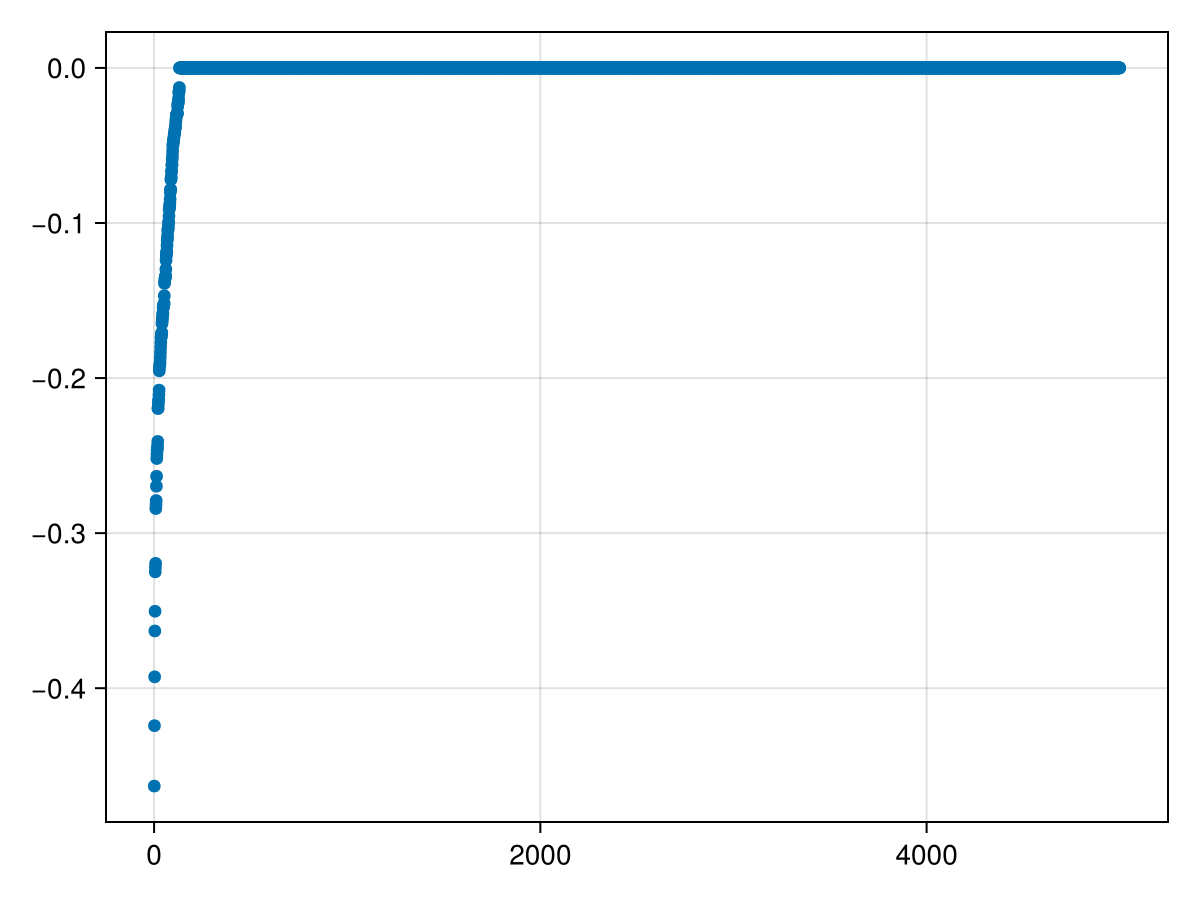

In [244]:
scatter(sort(dN[:]))

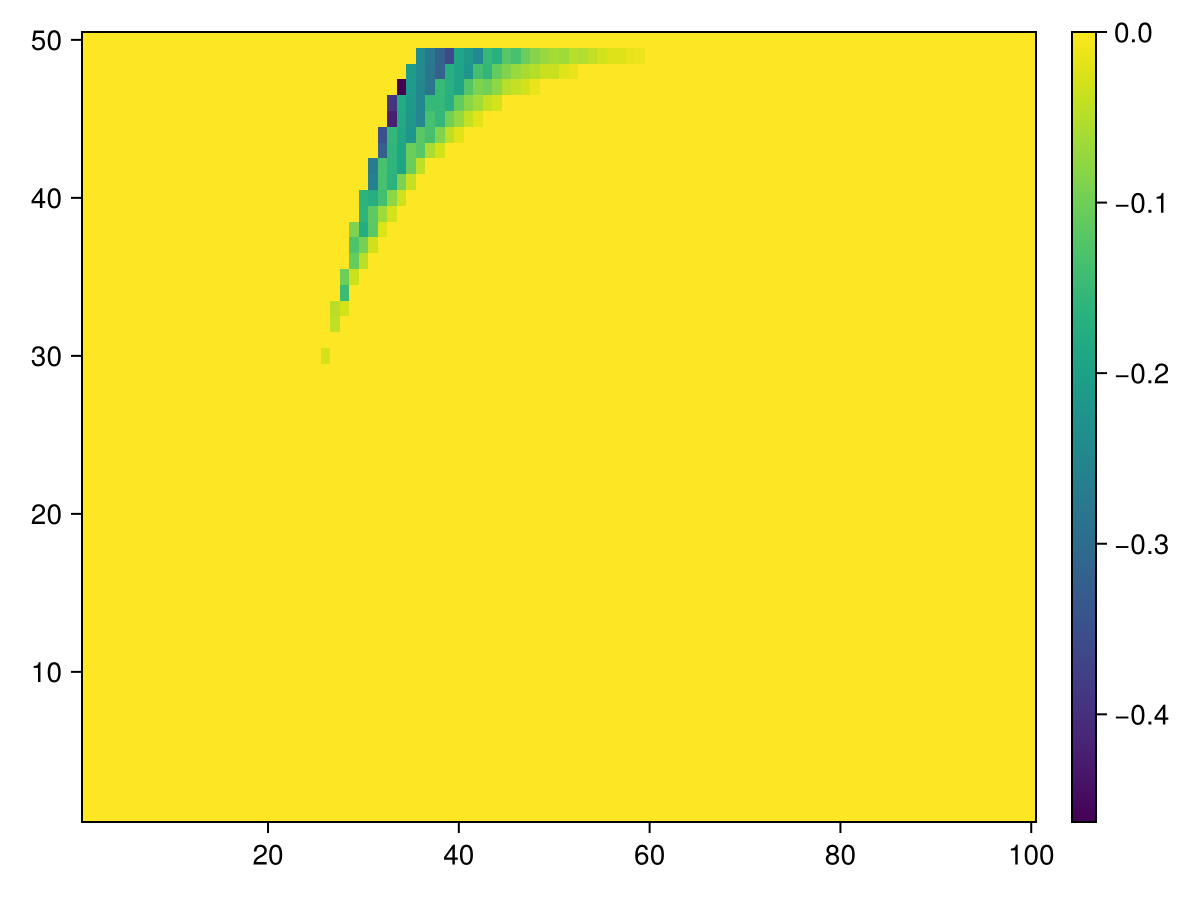

In [240]:
fap = heatmap(dN;
# fap = heatmap(dN / (Nws .+ Nns);
    # colorscale=Makie.Symlog10(1000000*eps())
    # colorscale=Makie.pseudolog10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

## Looking at the data first

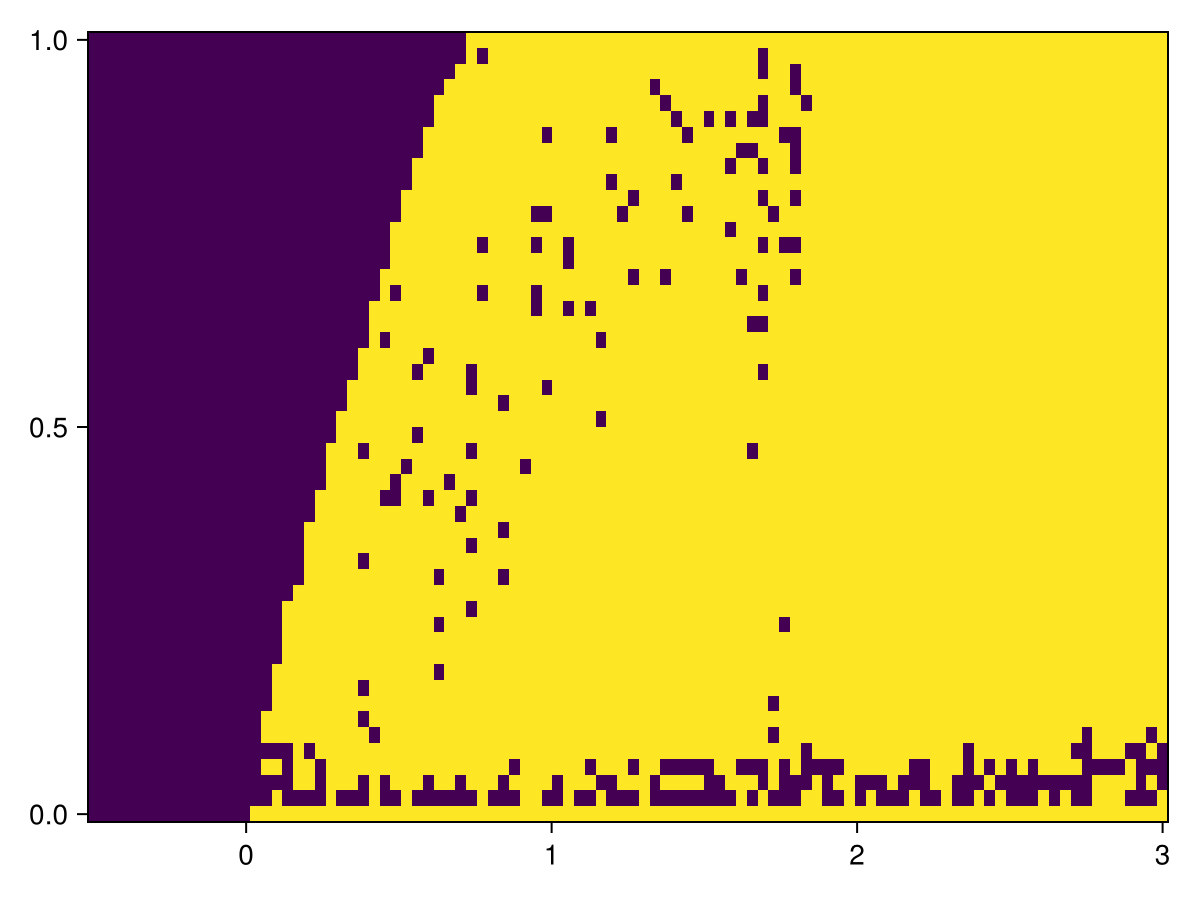

In [306]:
heatmap(f["logKs"], f["ls"], Int.(f["retcodes"]))

In [79]:
xx = findall(f["retcodes"][:,end-1]) do rc
    rc == ReturnCode.Success
end
show(xx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 63]

In [74]:
xx = findall(f["retcodes"]) do rc
    rc == ReturnCode.Success
end;

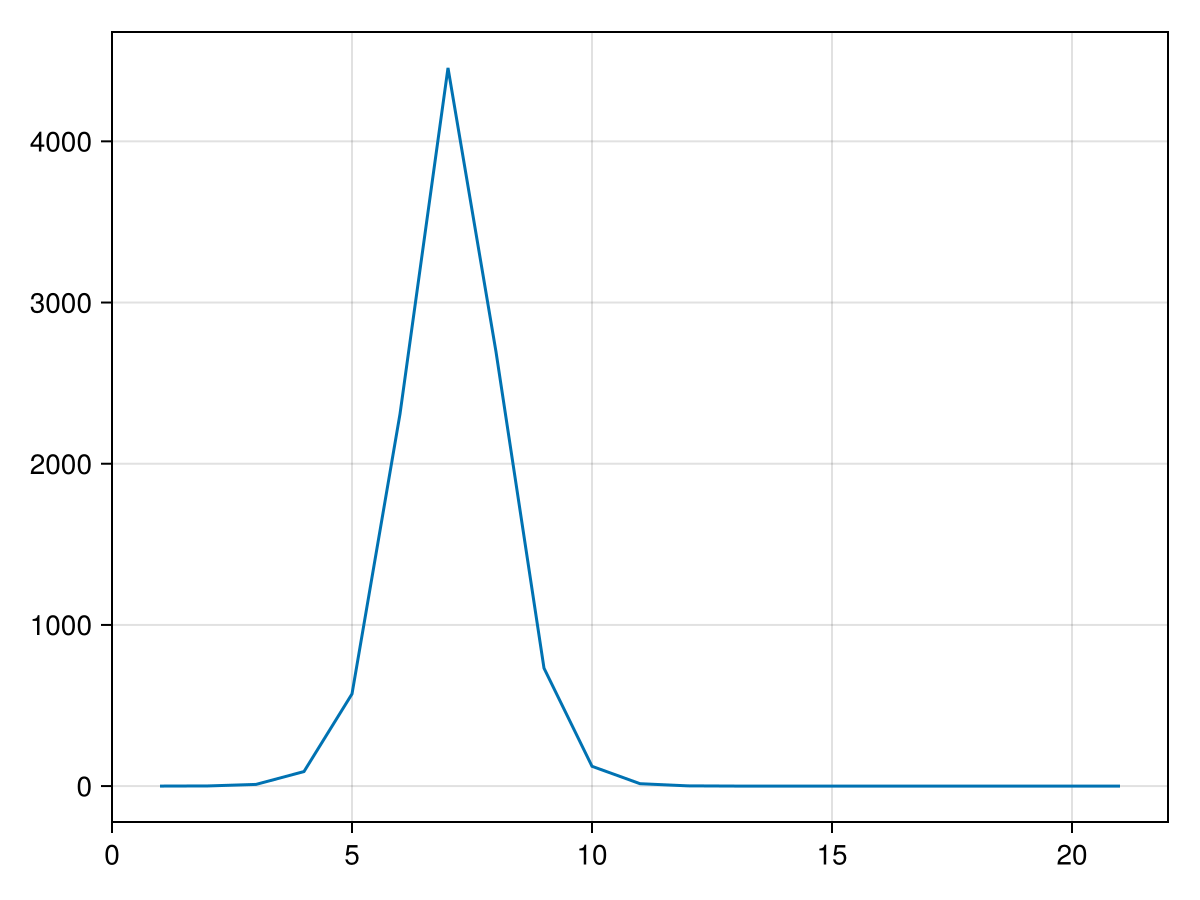

In [303]:
lines(sf[34,end-4][1,2140:2160])

# No-space

In [184]:
@time m3r = main3();

Progress: 100%|█████████████████████████████████████████| Time: 0:00:50


 50.831509 seconds (50.17 M allocations: 4.181 GiB)


In [185]:
countmap(m3r.retcodes)

Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 5000

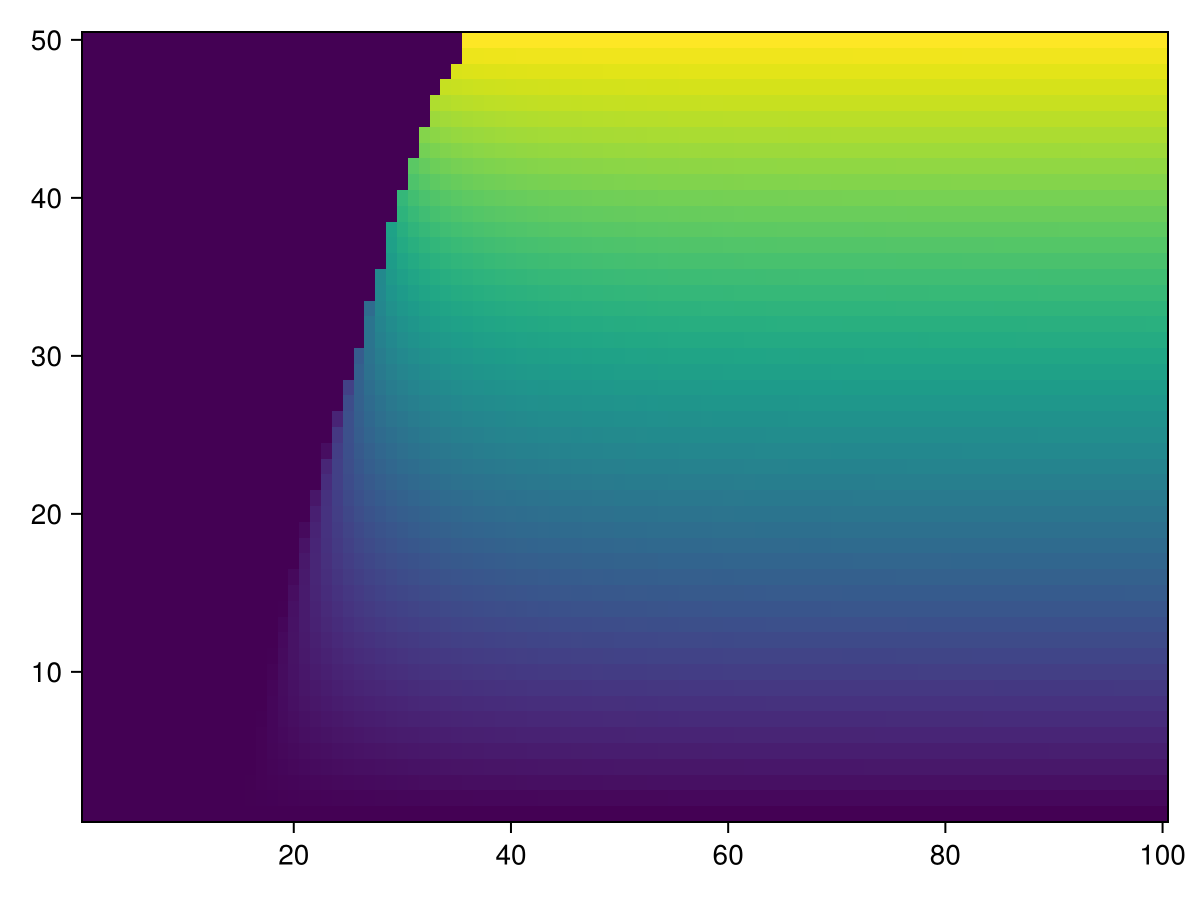

In [186]:
heatmap(getindex.(m3r.final_states, 3))

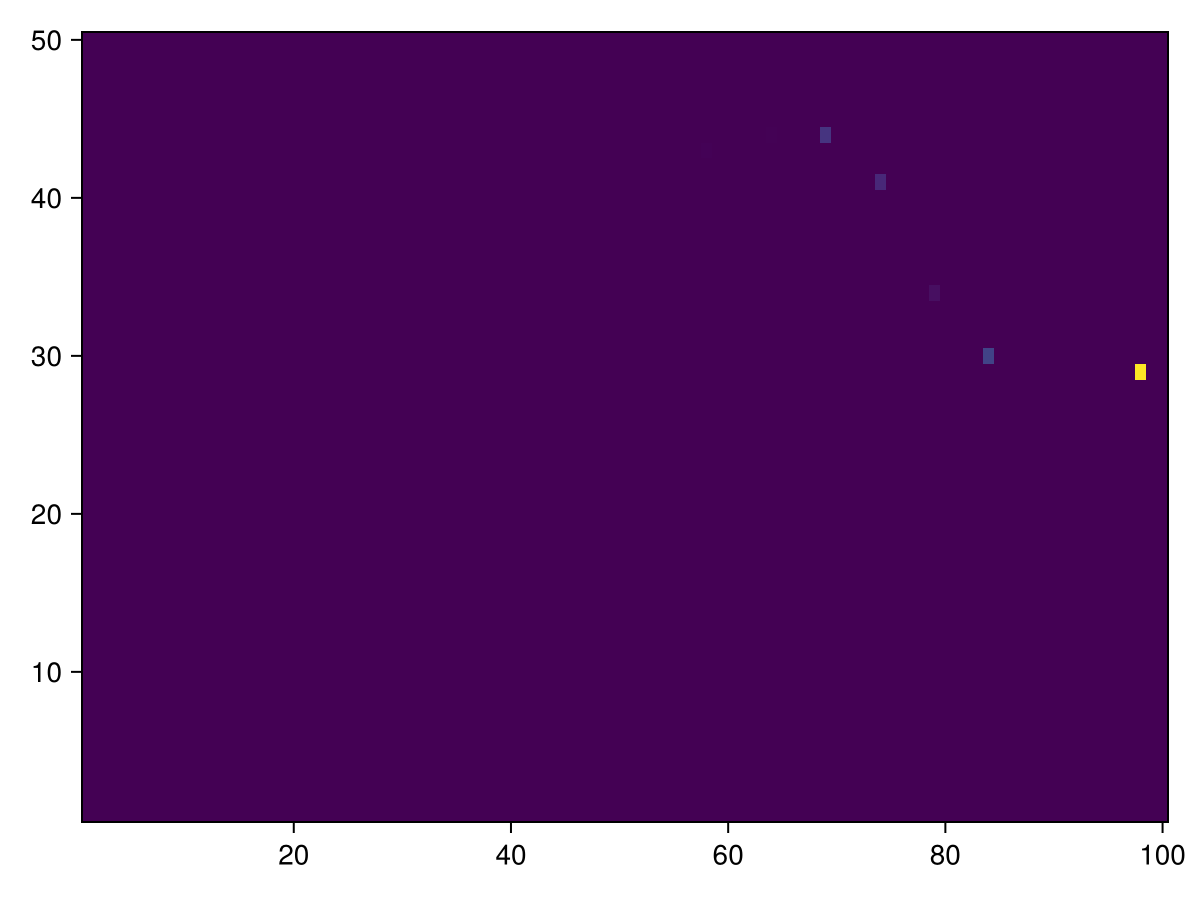

In [182]:
heatmap(maximum.(abs, mmicrmresid.(m3r.final_states, m3r.params)))